# ROBUST

This notebook is used to reproduce produce the figures for the paper, "ROBUST: Replicating and Understanding 208 Bugs in Robot Operating System".

In [1]:
import collections
import os
import typing as t

import IPython
import tabulate
import yaml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from robust import BugDescription, ROBUST
    
DATASET = ROBUST("..")


def table(contents: t.Sequence[t.Sequence[t.Any]]) -> None:
    """Produces a pretty table in the notebook."""
    html = IPython.display.HTML(tabulate.tabulate(con|tents, tablefmt='html'))
    IPython.display.display|(html)
    
    
def counter_to_df(counter: collections.Counter, index: str) -> pd.DataFrame:
    """Converts a counter to a Pandas DataFrame."""
    # https://stackoverflow.com/questions/31111032/transform-a-counter-object-into-a-pandas-dataframe
    df = pd.DataFrame.from_dict(counter, orient='index')
    df = df.reset_index()
    df = df.rename(columns={'index': index, 0: 'Frequency'})
    return df.set_index(index)

### What languages are involved in the fix?

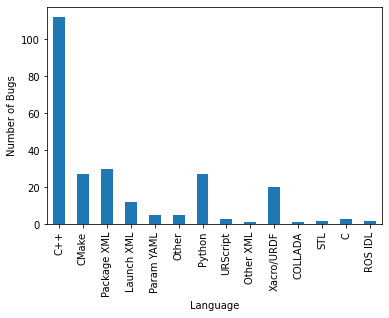

In [10]:
def language_vs_number_of_bugs() -> None:
    tally = collections.Counter()
    renamings = {
        'srv': 'ROS IDL',
        'ROS Message': 'ROS IDL',
        '.gitattributes': 'Other',
        'Other YAML': 'Other',
        'RViz': 'Other',
        'udev rules': 'Other',
        'Shell': 'Other',
        'Xacro': 'Xacro/URDF',
        'URDF': 'Xacro/URDF', 
    }
    
    for bug_description in DATASET.values():
        for language in (bug_description.fix.languages or []):
            language = renamings.get(language, language)
            tally[language] += 1
            
    df = counter_to_df(tally, 'Language')
    df.plot(kind='bar', ylabel='Number of Bugs', legend=False)
    # print(df)
    

language_vs_number_of_bugs()

### How many fixes cover more than one language?

In [14]:
# TODO

### How many files are modified by the fix?

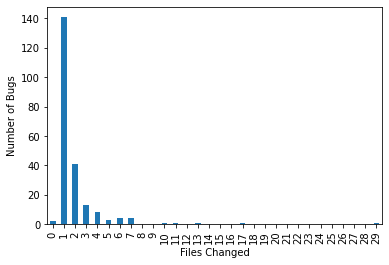

In [9]:
def num_files_fixed() -> None:
    tally = collections.Counter()
    for description in DATASET.values():
        fixed_files = description.fix.fix_in
        if fixed_files is None:
            num_fixed = 0
        else:
            num_fixed = len(fixed_files)
        tally[num_fixed] += 1
        
    max_files_changed = max(tally)
    files_changed_to_num_bugs = {n: tally[n] for n in range(max_files_changed + 1)}
        
    df = counter_to_df(files_changed_to_num_bugs, 'Files Changed')
    df.plot(kind='bar', ylabel='Number of Bugs', legend=False)
    # print(df)


num_files_fixed()

Let's find out what files are modified by the associated PR or fix commit.

### How many lines are changed by the fix? (diff lines)

In [15]:
# TODO

### How often is a test case provided as part of the fix commit(s)?

In [12]:
# TODO